<a href="https://colab.research.google.com/github/parag-ghungrudkar/Coursera_Capstone_Project/blob/main/Coursera_Capstone_Bengaluru_Nightlife.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Coursera Capstone Project: Bengaluru Nightlife**

##**Table of content**

1. Introduction to Business Problem
2. Data Understanding
3. Exploratory Data Analysis
5. Mehtodology
6. Results and Discussions 
7. Conclusion

##**Introduction to Business Problem**

Bengaluru city is well known for its nightlife. Thousands of Bengalurians look for escape venues on Friday nights and weekends. However, finding the best venues for hangouts is a conundrum, given the plethora of choices available. 

This Data Analytics project intends to help make better choices by clustering similar venues based on three parameters: Rating, Price, and the number of likes. This project can also be of interest for businesses looking to tap on to the business opportunity from the bustling nightlife of Bengaluru. 

##**Data Understanding**

###**a)Data Gathering**
 
 Based on the problem statement in hand, I needed to collect data that consists of various venues in different categories. From the FourSqaure API Docs, I got categories ID for NightLife venues. I used these ID to get intial list of venues from the FourSquare DataBase using Get Request. 



In [ ]:
! pip install geocoder #installing this library to get latitude and longitudes from the address

     |████████████████████████████████| 102kB 4.0MB/s 


In [ ]:
#importing the required libraries
import pandas as pd #library to work with dataframes
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import numpy as np # to perform mathematical operations on series
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests #library to make http requests in python
from bs4 import BeautifulSoup #library to handle data from html files
import folium # map rendering library
from sklearn.cluster import KMeans
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
print('All required imported _____')
import matplotlib.pyplot as plt 

All required imported _____


In [ ]:
CLIENT_ID = '0GNGY4JRBUZ32X5431M5XKQKOP2RPGGC2HGQQDGHZNGPC2TF' #  Foursquare ID
CLIENT_SECRET = 'Q2ENBL0VQ5CGBDTWCMHF5EJWK3I5D1GD0UB0QQIEMPCW20I4'# Foursquare Secret
ACCESS_TOKEN = 'ZJEKYKVB5AUQN3UYKTXHZFI1GXE1Z1SBU01TNFEPY2NFIK5K' #  FourSquare Access Token
VERSION = '20180604'
LIMIT = 1000
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 0GNGY4JRBUZ32X5431M5XKQKOP2RPGGC2HGQQDGHZNGPC2TF
CLIENT_SECRET:Q2ENBL0VQ5CGBDTWCMHF5EJWK3I5D1GD0UB0QQIEMPCW20I4


Since I am looking for venues in Bengalrur city. I used geolocator library to get the location coordinates of Bengaluru.

In [ ]:
address = 'Bengaluru, Karnataka'

geolocator = Nominatim(user_agent="tr_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Bengaluru are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Bengaluru are 12.9791198, 77.5912997.


Using the Foursqaure API Categories ID docs, I collated all the required Categories in the night_life_catID dictonary. 

On some research, I found that most of the outing spot fall under the falling categories: 


*   Beer Bar
*   Beer Garden
*   Hookah Bar
*   Pub
*   Sports Bar
*   Brewery
*   Lounge

Also, since Foursqaure API returns maximum of 50 venues per call, I used dictonary with IDs for each categories instead of just using ID for night_life , under which all the above fall. 

In [ ]:
night_life_catID = {
    
  'Beer Bar' : '56aa371ce4b08b9a8d57356c',
  'Beer Garden' : '4bf58dd8d48988d117941735',
  'Hookah Bar' : '4bf58dd8d48988d119941735',
  'Pub' : '4bf58dd8d48988d11b941735',
  'Sports Bar' : '4bf58dd8d48988d11d941735',
  'Brewery' : '50327c8591d4c4b30a586d5d',
  'Lounge' : '4bf58dd8d48988d121941735'

}


Next, I used FourSqaure API url request to get all possible venues. The next two block of codes functions to pull the request and transform the received data to pandas DataFrame.

In [ ]:
#this funciton is used to  category of the venue from the recieved json file
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [ ]:
venues_data = pd.DataFrame() #defining an empty dataframe for the  venues data

# for loop that iterates through all the categories IDs and appends the fetched venue data to veneus_data dataframe
for catID in night_life_catID.values() : 
   print('Gathering Data for the Category ID: {}'.format(catID))
   url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&limit={}&categoryId={}'.format( CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION,LIMIT,catID)
   results = requests.get(url).json()
   venues = results['response']['venues']
   dataframe = pd.json_normalize(venues)
   # keeping only columns that include venue name, and anything that is associated with location
   filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
   dataframe_filtered = dataframe.loc[:, filtered_columns]
   # filtering the category for each row
   dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)
   # clean column names by keeping only last term
   dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]
   df_venues = dataframe_filtered
   df_venues = df_venues[['name','categories','lat','lng','id']]
   venues_data = venues_data.append(df_venues)
   
venues_data.drop_duplicates(subset ="name", keep = 'first', inplace = True) 
print('Venues DataFrame Generated')

Gathering Data for the Category ID: 56aa371ce4b08b9a8d57356c
Gathering Data for the Category ID: 4bf58dd8d48988d117941735
Gathering Data for the Category ID: 4bf58dd8d48988d119941735
Gathering Data for the Category ID: 4bf58dd8d48988d11b941735
Gathering Data for the Category ID: 4bf58dd8d48988d11d941735
Gathering Data for the Category ID: 50327c8591d4c4b30a586d5d
Gathering Data for the Category ID: 4bf58dd8d48988d121941735
Venues DataFrame Generated


In [ ]:
# This is the intial venue data generated
venues_data.head() 

,name,categories,lat,lng,id
0,Wall St.,Beer Bar,12.906584,77.590085,5942ab989deb7d7da8ea4700
1,Barley & Grapes Cafe,Beer Bar,13.199486,77.709608,5c6d63aa6fd626002c84dbe6
2,Stories,Beer Bar,13.008568,77.549108,5acce68067e5f23527ed1563
3,Plan B,Beer Bar,12.967345,77.714690,5c8cb011a8792100392f4b6b
4,Gilly's,Beer Bar,12.955587,77.714422,58c426ffcc5b6a395964a87a


I wanted to check the number of veneus under different categories. I used the value_counts function to get the same. 
As observed majority of the veneus fall under the following categories : Brewery, Hookah Bar, Beer Garden, Pub, Sports Bar

In [ ]:

venues_data['categories'].value_counts()

Brewery                       46
Hookah Bar                    44
Lounge                        43
Beer Garden                   40
Pub                           37
Sports Bar                    29
Beer Bar                       7
Café                           3
Bar                            3
Hotel Bar                      2
General Entertainment          2
Tennis Stadium                 1
Seafood Restaurant             1
Bowling Alley                  1
Shopping Mall                  1
Arcade                         1
Coffee Shop                    1
Japanese Restaurant            1
Financial or Legal Service     1
Name: categories, dtype: int64

Now that I have intial list of venues with me, I needed more information for my analysis. Since the analysis is based on Rating, Price, and Like_counts, I used FourSquare's premium Venue Details API endpoint to get necessary data. 

In [ ]:
Rating = [] 
Like_counts = []
Price = []
for row in venues_data['id']:
  venue_id = row
  url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&oauth_token={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET,ACCESS_TOKEN, VERSION)
  result = requests.get(url).json()
  try:
   Rating.append(result['response']['venue']['rating'])
  except:
   Rating.append(np.NaN)
  try:
    Price.append(result['response']['venue']['price']['message'])
  except:
    Price.append(np.NaN)
  try:
    Like_counts.append(result['response']['venue']['likes']['count'])
  except:
    Like_counts.append(np.NaN)

In [ ]:
venues_data['Rating'] = Rating
venues_data['Price'] = Price
venues_data['Likes'] = Like_counts

b) Data Cleansing

I dropped venues for which data was not available. The final number of venues boiled down to around 75. My final analysis will be on these venues. 


In [ ]:
venues_data = venues_data.dropna()
venues_data.sort_values(by = ['Rating'], inplace = True, ascending =False)
venues_data.reset_index(inplace= True, drop = True)
venues_data.shape

(72, 8)

In [ ]:
#This is the final dataframe on venues that I will be working on 

venues_data.head()

,name,categories,lat,lng,id,Rating,Price,Likes
0,Windmills Craftworks,Brewery,12.982460,77.721861,5056abd4e4b07ba3e77d061b,9.2,Moderate,382
1,Toit Brewpub,Brewery,12.979367,77.640702,4d74e829e278f04d748c5db8,9.1,Expensive,986
2,Arbor Brewing Company,Brewery,12.970140,77.610857,50b8cfebe4b0b45a1a4919ad,8.9,Expensive,603
3,Whitefield Social,Lounge,12.997343,77.696288,5662f272498eac2dc526e83a,8.8,Expensive,34
4,Windmills Craftswork,Brewery,13.199887,77.709638,5c849a711953f3002c8a751e,8.7,Moderate,9


In [ ]:
venues_data.to_csv('Venues_data.csv')

In [ ]:
venues_data = pd.read_csv('Venues_data.csv')
venues_data = venues_data[['name','categories','lat','lng','id','Rating','Price','Likes']]
venues_data.head()

,name,categories,lat,lng,id,Rating,Price,Likes
0,Windmills Craftworks,Brewery,12.982460,77.721861,5056abd4e4b07ba3e77d061b,9.2,Moderate,382
1,Toit Brewpub,Brewery,12.979367,77.640702,4d74e829e278f04d748c5db8,9.1,Expensive,986
2,Arbor Brewing Company,Brewery,12.970140,77.610857,50b8cfebe4b0b45a1a4919ad,8.9,Expensive,603
3,Whitefield Social,Lounge,12.997343,77.696288,5662f272498eac2dc526e83a,8.8,Expensive,34
4,Windmills Craftswork,Brewery,13.199887,77.709638,5c849a711953f3002c8a751e,8.7,Moderate,9


#**Exploratory Data Analysis**

with the required data in hand, I did some exploratory data analysis. I used histogram to understand the distrubtion of Rating and likes across different venues. Also, I used bar graph to visualize the distribution of the venues in the three price ranges.

<function matplotlib.pyplot.show>

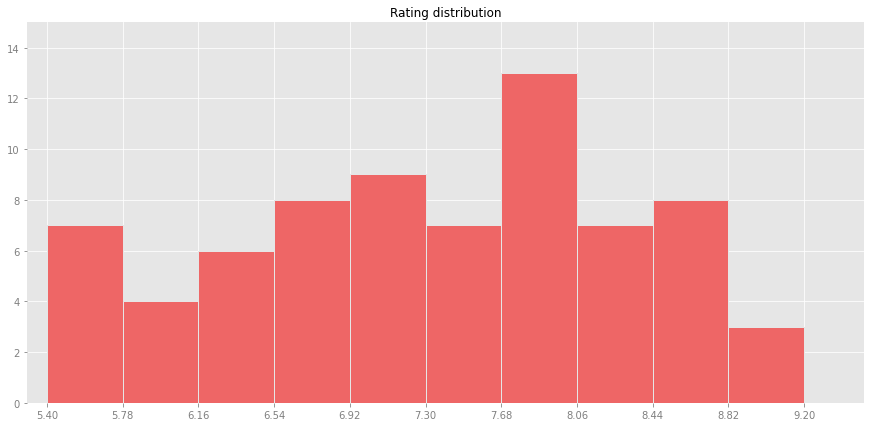

In [ ]:
# this block of code plots the distribution rating and histogram. 
# this part of the code styles the histogram plot.
fig, ax = plt.subplots(figsize=(15, 7))
ax = plt.axes(facecolor='#E6E6E6')
ax.set_axisbelow(True)

# draw solid white grid lines
plt.grid(color='w', linestyle='solid')

# hide axis spines
for spine in ax.spines.values():
    spine.set_visible(False)
    
# hide top and right ticks
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

# lighten ticks and labels
ax.tick_params(colors='gray', direction='out')
for tick in ax.get_xticklabels():
    tick.set_color('gray')
for tick in ax.get_yticklabels():
    tick.set_color('gray')

# control face and edge color of histogram
n, bins, edges = ax.hist(x = venues_data.Rating,bins=10, edgecolor='#E6E6E6', color='#EE6666');
plt.xticks(bins)
plt.xlim(5.3,9.5)
plt.ylim(0,15)
plt.title('Rating distribution')

plt.show

###Understanding from the Rating histogram: 

The main highlights from the above histogram :  

*   Majority of the venues have  rating between 7 to 8. 
*   There are only two Venues with rating over 8.83
*   12 Venues have poor rating that is below 6


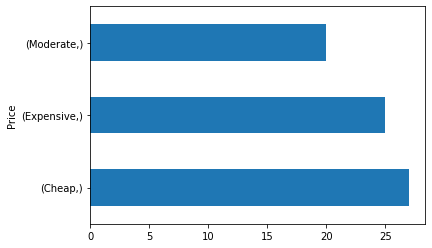

In [ ]:
venues_data[['Price']].value_counts().plot(kind = 'barh')

###Understanding from the above bar graph:

*   The number of venues across different Price range are almost equally distributed and ranging between 20 to 30


<function matplotlib.pyplot.show>

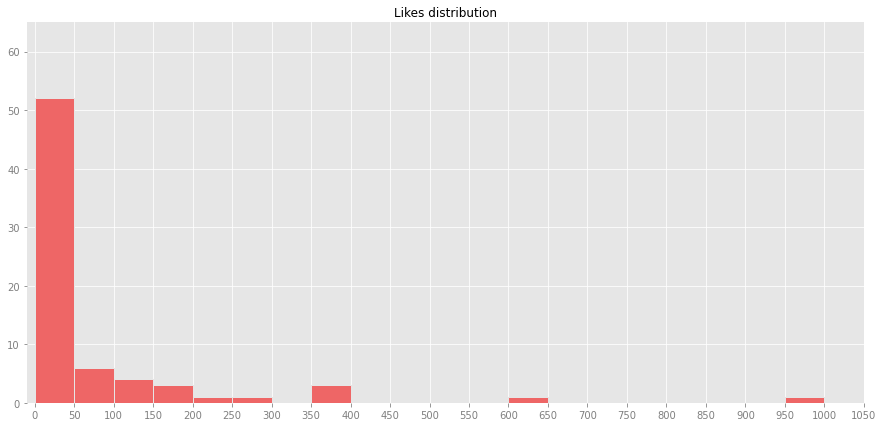

In [ ]:
# this block of code plots the frequency distribution of number of likes in a histogram

fig, ax = plt.subplots(figsize=(15, 7))
ax = plt.axes(facecolor='#E6E6E6')

ax.set_axisbelow(True)

# draw solid white grid lines
plt.grid(color='w', linestyle='solid')

# hide axis spines
for spine in ax.spines.values():
    spine.set_visible(False)
    
# hide top and right ticks
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

# lighten ticks and labels
ax.tick_params(colors='gray', direction='out')
for tick in ax.get_xticklabels():
    tick.set_color('gray')
for tick in ax.get_yticklabels():
    tick.set_color('gray')

# control face and edge color of histogram
n,bins,edges = ax.hist(x = venues_data.Likes,bins=list(range(0,1200,50)), edgecolor='#E6E6E6', color='#EE6666')
plt.xticks(bins)
plt.xlim(-10,1050)
plt.ylim(0,65)
plt.title('Likes distribution')

plt.show

###Understanding from above histogram: 

This particular histogram is quite interesting . The frequency distribution is sporadic which was not in the ratings case that we saw earlier. Main highlights from the above histogram are as follows: 

*   Near about 50 veneus fell in the range of 0-50. These venues could be either less popular or less like by the visitors. To investigate this further, I plotted a scatter plot for 'number of likes Vs. Rating'. 
*   There few outliers in the histogram that have likes in the range of 950-1000. It would be interesting to see if they are the same venues with maximum rating. 



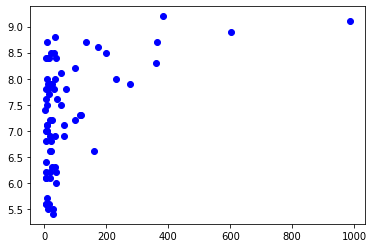

In [ ]:
plt.scatter(x = venues_data.Likes, y = venues_data.Rating, color = 'blue')
')

Understanding from above plot

**Using** folium library, I plotted the venues on the map. I can be noted from the map that most of the venues are clustered together. These locations must be the city centers. I preferred not to digress from current investigation, but it would be interesting to see if location has any effect on the number of likes and Rating.

In [ ]:
map_banglore= folium.Map(location = [latitude, longitude], zoom_start = 12 )

for lat, lng, name, catgories in zip(venues_data['lat'], venues_data['lng'], venues_data['name'], venues_data['categories']):
  label = '{},{}'.format(name, catgories)
  label = folium.Popup(label, parse_html=True)
  folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_banglore)  
    
map_banglore

#**Methodology**

This section of the notebook, explores the method used to cluster the neighborhood. I decided to go forward with sklearn library's Kmeans algorithm.

But first, It required conversting all the input variables into numeric variables. Since the price column has three parameteres, I used one hot encoding method to convert them to binary variables. 

In [ ]:
# one hot encoding
venues_data_onehot = pd.get_dummies(venues_data[['Price']], prefix="", prefix_sep="")

# adding venues column back to dataframe
venues_data_onehot['venue'] = venues_data['name'] 

# moving venues column to the first column
fixed_columns = [venues_data_onehot.columns[-1]] + list(venues_data_onehot.columns[:-1])
venues_data_onehot = venues_data_onehot[fixed_columns]

venues_data_onehot.head()

,venue,Cheap,Expensive,Moderate
0,Windmills Craftworks,0,0,1
1,Toit Brewpub,0,1,0
2,Arbor Brewing Company,0,1,0
3,Whitefield Social,0,1,0
4,Windmills Craftswork,0,0,1


In [ ]:
# merging the one hot encoded price variable with the other variables
final_venues_data = pd.merge(venues_data, venues_data_onehot, left_on = 'name', right_on= 'venue') 
final_venues_data.drop('venue', axis = 1, inplace = True) #droping the venues columns 
final_venues_data.head()

,name,categories,lat,lng,id,Rating,Price,Likes,Cheap,Expensive,Moderate
0,Windmills Craftworks,Brewery,12.982460,77.721861,5056abd4e4b07ba3e77d061b,9.2,Moderate,382,0,0,1
1,Toit Brewpub,Brewery,12.979367,77.640702,4d74e829e278f04d748c5db8,9.1,Expensive,986,0,1,0
2,Arbor Brewing Company,Brewery,12.970140,77.610857,50b8cfebe4b0b45a1a4919ad,8.9,Expensive,603,0,1,0
3,Whitefield Social,Lounge,12.997343,77.696288,5662f272498eac2dc526e83a,8.8,Expensive,34,0,1,0
4,Windmills Craftswork,Brewery,13.199887,77.709638,5c849a711953f3002c8a751e,8.7,Moderate,9,0,0,1


In [ ]:
final_venues_data.dtypes # checking the data types of input variables in the final dataframe

name           object
categories     object
lat           float64
lng           float64
id             object
Rating        float64
Price          object
Likes           int64
Cheap           uint8
Expensive       uint8
Moderate        uint8
dtype: object

##K_means clustering

In the initial revisions, I executed the clustering of the venues without normalizing the parameters. However, on analysis it occurred to me that the cluster were biased towards the number of likes. Though the cluster gave good insights but I decided to go forward with normalizing the data to remove the bias. 
One unintended but fortunate effect of this was that pricing had a greater bias now as a result, the venues sorted themselves out based on price category. 

I decided the number of cluster based on following assumption: 

*   Under the pricing column the venues fall under : Cheap, Moderate, and Expensive
*   Under the Rating column the venues fall under : Bad, Decent, and Good

From high level permutation and combinations, we can have 3*3 = 9 possibilities



In [ ]:
venues_clustering = final_venues_data.drop(['name','categories','lat','lng','id','Price'], 1)
column_maxes = venues_clustering.max()
venues_clustering['Rating'] = venues_clustering['Rating']/column_maxes[0]
venues_clustering['Likes'] = venues_clustering['Likes']/column_maxes[1]

venues_clustering.head()

,Rating,Likes,Cheap,Expensive,Moderate
0,1.000000,0.387424,0,0,1
1,0.989130,1.000000,0,1,0
2,0.967391,0.611562,0,1,0
3,0.956522,0.034483,0,1,0
4,0.945652,0.009128,0,0,1


In [ ]:
# set number of clusters
kclusters = 9

# run k-means clustering
kmeans = KMeans(init= 'k-means++',n_clusters=kclusters, n_init = 12, random_state=0).fit(venues_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([4, 3, 6, 2, 0, 2, 6, 0, 2, 2], dtype=int32)

In [ ]:
final_venues_data.insert(11, 'Cluster Labels', kmeans.labels_) #inserting the cluster lables to the final venues dataframe

In [ ]:
final_venues_data.head()

,name,categories,lat,lng,id,Rating,Price,Likes,Cheap,Expensive,Moderate,Cluster Labels
0,Windmills Craftworks,Brewery,12.982460,77.721861,5056abd4e4b07ba3e77d061b,9.2,Moderate,382,0,0,1,4
1,Toit Brewpub,Brewery,12.979367,77.640702,4d74e829e278f04d748c5db8,9.1,Expensive,986,0,1,0,3
2,Arbor Brewing Company,Brewery,12.970140,77.610857,50b8cfebe4b0b45a1a4919ad,8.9,Expensive,603,0,1,0,6
3,Whitefield Social,Lounge,12.997343,77.696288,5662f272498eac2dc526e83a,8.8,Expensive,34,0,1,0,2
4,Windmills Craftswork,Brewery,13.199887,77.709638,5c849a711953f3002c8a751e,8.7,Moderate,9,0,0,1,0


In [ ]:
Clustered_venues = final_venues_data[['name', 'Cluster Labels','Rating','Price','Likes','lat','lng']]
Clustered_venues.head() # final veneus dataframe with cluster lables

,name,Cluster Labels,Rating,Price,Likes,lat,lng
0,Windmills Craftworks,4,9.2,Moderate,382,12.982460,77.721861
1,Toit Brewpub,3,9.1,Expensive,986,12.979367,77.640702
2,Arbor Brewing Company,6,8.9,Expensive,603,12.970140,77.610857
3,Whitefield Social,2,8.8,Expensive,34,12.997343,77.696288
4,Windmills Craftswork,0,8.7,Moderate,9,13.199887,77.709638


#**Results and Analysis**

##Cluster Label 0 : 'Moderate and Good but not well known


In [ ]:
df1 = Clustered_venues.loc[Clustered_venues['Cluster Labels'] == 0]
df1

,name,Cluster Labels,Rating,Price,Likes,lat,lng
4,Windmills Craftswork,0,8.7,Moderate,9,13.199887,77.709638
7,Big Brewsky,0,8.6,Moderate,172,12.913141,77.683233
10,The Druid Garden,0,8.5,Moderate,20,13.063946,77.591492
11,XOOX Brewmill,0,8.4,Moderate,11,12.935507,77.614982
14,Uru Brewpark,0,8.4,Moderate,5,12.905577,77.600966
16,153 Biere Street,0,8.2,Moderate,97,12.962717,77.750815
17,Bangalore Brew Works,0,8.1,Moderate,54,12.968365,77.601662
20,Communiti,0,8.0,Moderate,33,12.972618,77.608225
23,Biergarten,0,7.9,Moderate,23,12.982449,77.708620
26,Byg Brewski,0,7.8,Moderate,10,13.070837,77.652310


##Cluster Label 1: 'Cheap and Decent'



In [ ]:
df2 = Clustered_venues.loc[Clustered_venues['Cluster Labels'] == 1]
df2

,name,Cluster Labels,Rating,Price,Likes,lat,lng
12,House of Commons,1,8.4,Cheap,14,12.911994,77.638938
13,The Permit Room,1,8.4,Cheap,36,12.970388,77.610358
21,Dublin,1,7.9,Cheap,19,12.994301,77.585712
24,Hammered,1,7.9,Cheap,17,12.986382,77.595154
27,The Local,1,7.8,Cheap,32,13.021270,77.641574
29,Vapour - Pub and Brewery,1,7.8,Cheap,6,12.914370,77.677387
34,Guzzlers Inn,1,7.5,Cheap,53,12.973722,77.606972
38,The Open Box,1,7.2,Cheap,19,12.970632,77.600642
42,Harry's Singapore,1,7.1,Cheap,8,12.964481,77.641691
43,Le Rock,1,7.1,Cheap,62,12.973604,77.607103


##Cluster label 2: 'Expensive and Decent'

In [ ]:
df3 = Clustered_venues.loc[Clustered_venues['Cluster Labels'] == 2]
df3

,name,Cluster Labels,Rating,Price,Likes,lat,lng
3,Whitefield Social,2,8.8,Expensive,34,12.997343,77.696288
5,The 13th Floor,2,8.7,Expensive,133,12.975364,77.604995
8,Koramangala Social,2,8.5,Expensive,30,12.935518,77.614097
9,Skyye,2,8.5,Expensive,198,12.971646,77.596242
18,Fenny's Lounge & Kitchen,2,8.0,Expensive,230,12.935146,77.613536
19,eclipse lounge,2,8.0,Expensive,8,12.973695,77.644001
25,JW Marriott Executive Lounge,2,7.9,Expensive,12,12.972120,77.594804
28,High Ultra Lounge,2,7.8,Expensive,71,13.012204,77.555929
30,Bang,2,7.7,Expensive,14,12.967505,77.601757
31,The Whitefield Arms Café,2,7.6,Expensive,6,12.996539,77.695929


##Cluster label 3: standout : 'Expensive, excellent, and very well known'

In [ ]:
df4 = Clustered_venues.loc[Clustered_venues['Cluster Labels'] == 3]
df4

,name,Cluster Labels,Rating,Price,Likes,lat,lng
1,Toit Brewpub,3,9.1,Expensive,986,12.979367,77.640702


##Cluster label 4: 'Moderate, Good, and well known'

In [ ]:
df5= Clustered_venues.loc[Clustered_venues['Cluster Labels'] == 4]
df5

,name,Cluster Labels,Rating,Price,Likes,lat,lng
0,Windmills Craftworks,4,9.2,Moderate,382,12.982460,77.721861
15,The Biere Club,4,8.3,Moderate,359,12.971061,77.597657
22,Big Pitcher,4,7.9,Moderate,276,12.960101,77.646946


##Cluster label 5: 'Moderate and Bad'

In [ ]:
Clustered_venues.loc[Clustered_venues['Cluster Labels'] == 5]

,name,Cluster Labels,Rating,Price,Likes,lat,lng
50,The Pallet - Brewhouse & Kitchen,5,6.8,Moderate,6,12.991019,77.723190
60,The Local - Terrace Drinkery,5,6.2,Moderate,37,12.940830,77.624455
62,Brooks And Bonds,5,6.1,Moderate,5,12.934148,77.623396
63,Brewmeister,5,6.1,Moderate,6,12.926405,77.584676
71,3 Monkeys BrewPub,5,5.4,Moderate,29,12.993100,77.661134


##Cluster label 6: 'Expensive, Good, and well known'

In [ ]:
df6 = Clustered_venues.loc[Clustered_venues['Cluster Labels'] == 6]
df6

,name,Cluster Labels,Rating,Price,Likes,lat,lng
2,Arbor Brewing Company,6,8.9,Expensive,603,12.970140,77.610857
6,Church Street Social,6,8.7,Expensive,362,12.975559,77.602579


##Cluster label 7:'Cheap and bad'



In [ ]:
Clustered_venues.loc[Clustered_venues['Cluster Labels'] == 7]

,name,Cluster Labels,Rating,Price,Likes,lat,lng
53,Extreme Sports Bar (Play Arena),7,6.6,Cheap,18,12.911461,77.676310
54,Sherlock Holmes,7,6.6,Cheap,21,12.994784,77.615134
55,Hungry Hippie,7,6.4,Cheap,4,12.934601,77.615934
57,Jimis Beer Cafe,7,6.3,Cheap,33,12.940823,77.624418
58,Enigma - The Pub,7,6.2,Cheap,19,12.934193,77.623648
59,SH 17 Restaurant,7,6.2,Cheap,5,12.810228,77.402944
64,Mockaholic Restro Beer Cafe,7,6.0,Cheap,36,12.915569,77.585718
66,Cafe Coffee Day,7,5.6,Cheap,6,12.932722,77.623113
67,Dug Out Sports Bar,7,5.6,Cheap,14,12.932536,77.613865
68,SBX Sports & Music Cafe,7,5.6,Cheap,5,12.979571,77.694530


##Cluster label 8:'Expensive, Bad, and not well known'



In [ ]:
Clustered_venues.loc[Clustered_venues['Cluster Labels'] == 8]['Type'] = 'Expensive, Bad, and not well known'

,name,Cluster Labels,Rating,Price,Likes,lat,lng
40,The Studio Bar,8,7.2,Expensive,24,13.010935,77.555017
41,Upbeat,8,7.1,Expensive,8,13.001185,77.629239
45,Firehouse,8,7.0,Expensive,9,13.026253,77.636219
47,Hoot,8,6.9,Expensive,18,12.914136,77.678596
51,Rasta S02E01,8,6.8,Expensive,20,13.020464,77.643167
56,Sutra,8,6.3,Expensive,24,12.991908,77.582296
61,Eden Park - The Lounge,8,6.1,Expensive,18,12.923387,77.585353
65,Loveshack,8,5.7,Expensive,8,12.952692,77.640193


#**Conclusion** :

From the above analysis, I was able to sort venues based on these three metrics: Price, Rating, and likes. This analysis could be used to select the most appropriate venue for an outing based on preferences. It also forms a basis for the recommendation system. 

From a business perspective, this analysis can be used as a starting point to research what an ideal venue should be to attract customers. Further, more libraries could be used to cluster the preferred venues based on venue, ambiance, etc. One interesting research would be to find whether the location has any effect on the three metrics. However, this analysis's scope is to cluster the venus based on the three metrics that have been achieved successfully. 
